In [1]:
import numpy
import matplotlib.pyplot as plt
from functions import sigma, sigma_diff, rec_bspline, nurbs_curve, besier_curve

# $\sigma_{m}\left(r, t\right)=\left(max\left[0, r-t\right]\right)^{m}$

In [2]:
x = numpy.linspace(-3, 3, num=1000)

In [3]:
y = sigma(2, x)

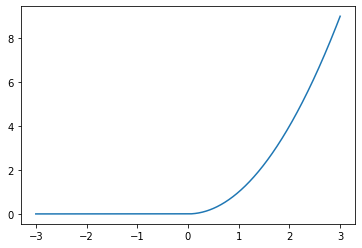

In [4]:
plt.plot(x, y)
plt.show()

# $\sigma_{m-1}\left[t_{0},\dots, t_{m}\right]\left(t\right)=\sum_{j=0}^{m}\frac{\left(t_j-t\right)^{m-1}_{+}}{\prod_{i=1, i\neq j}^{m}\left(t_j-t_i\right)}$

In [5]:
x = numpy.linspace(-3, 3, num=1000)

In [6]:
T = numpy.array([0, 1, 1.5, 2.0, 2.5])

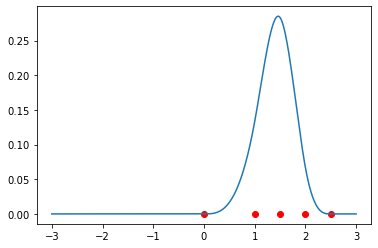

In [7]:
plt.plot(x, sigma_diff(T, x))
plt.scatter(T, numpy.zeros(T.shape[0]), c="red")
plt.show()

# B splines

# $N_{i,m}(t)=(t_{i+m}-t_i)\sigma_{m-1}\left[t_i, t_{i+1}, \dots, t_{i+m}\right](t)$

In [8]:
x = numpy.linspace(-6, 6, num=1000)

In [9]:
T = numpy.array([1, 2, 3, 4, 5, 5, 5, 5])

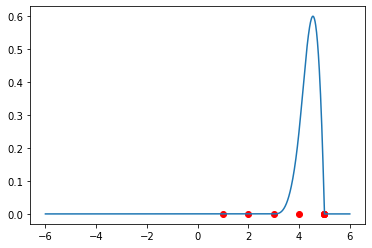

In [10]:
plt.plot(x, rec_bspline(2, 4, T, x))
plt.scatter(T, numpy.zeros(T.shape[0]), c="red")
plt.show()

# Test the correctness of 
# $\sum_{j}^{}N_{j,m}(t)=1$

In [78]:
x = numpy.linspace(-10, 10, num=1000)

In [79]:
T = numpy.array([1, 2, 3, 4, 5, 5.25, 5.5, 6])

In [80]:
result = numpy.zeros(x.shape[0])

degree = 4

for j in range(T.shape[0] - degree):
    
    result += rec_bspline(j, degree, T, x)

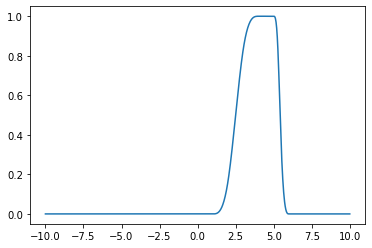

In [81]:
plt.plot(x, result)
plt.show()

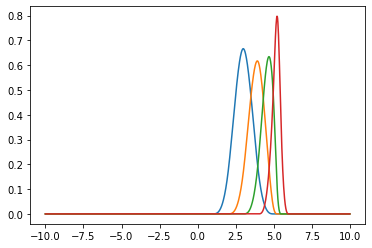

In [82]:
degree = 4

for j in range(T.shape[0]-degree):
    plt.plot(x, rec_bspline(j, degree, T, x))

# NURBS curve
# $r(\bar{t})=\frac{\sum_{i=1}^{n}N_{i, m}(t)\omega_i\bar{P}_i}{\sum_{i=1}^{n}N_{i, m}(t)\omega_i}$

In [181]:
points = numpy.array([
[-4, -2],    
[-1, -2],
[0, 0],
[-2, 2],
[0, 3],
[2, 2],
[0, 0],
[1, -2],
[4, -2]
])

nodes = numpy.array([0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 6, 6, 6])
weights = numpy.array([1, 1, 1, 1, 1, 1, 1, 1, 1])
degree = 4

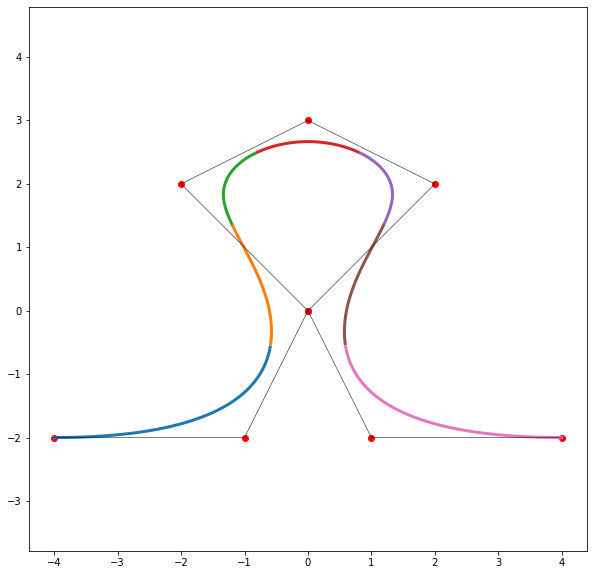

In [182]:
nurbs_curve(points=points,
            nodes=nodes,
            weights=weights,
            degree=degree,
            split=True,
            cascade=True,
            density=44)